# Исследование объявлений о продаже квартир

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и близлежащих населённых пунктов за несколько лет.   
## Задача  
Нам нужно определить рыночную стоимость объектов недвижимости. Для этого мы установим параметры, что позволит построить автоматизированную систему отслеживания аномалий и мошеннической деятельности. 

## План выполнения проекта

### 1. Чтение  данных

### 2. Предобработка данных  
  
- Определить и изучить пропущенные значения.
- Заполнить пропуски, где это уместно.
- Указать причины, которые могли привести к пропускам в данных.
- Привести данные к нужным типам.

### 3. Расчет дополнительных параметров

- цена квадратного метра;  
- день недели, месяц и год публикации объявления;  
- этаж квартиры; варианты — первый, последний, другой; 
- соотношение жилой и общей площади, а также отношение площади кухни к общей. 

### 4. Исследовательский анализ данных
- Изучить параметры: площадь, цена, число комнат, высота потолков. Построить гистограммы для каждого параметра.
- Изучить время продажи квартиры. Построить гистограмму. Посчитать среднее и медиану. Сколько обычно занимает продажа? Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Убрать редкие и выбивающиеся значения.
- Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависитмость цены от квадратного метра, числа комнат, удалённости от центра, этажа, даты размещения: дня недели, месяца и года.
- Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья.
- Изучить предложения квартир. Выделить квартиры в Санкт-Петербурге. Выяснить, какая область входит в центр.
- Выделить сегмент квартир в центре. Изучить параметры: площадь, цена, число комнат, высота потолков. Выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?

### 5. Вывод

### Шаг 1. Чтение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv('../datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
estate_data = pd.read_csv('../datasets/real_estate_data.csv', sep='\t', parse_dates=['first_day_exposition'])
estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
estate_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [4]:
estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

### Вывод

В данных 22 столбца и 23699 строк. Названия столбцов заданы корректно.     
Сразу считаем столбец с датами в нужном формате.  
Столбцы `total_images`, `last_price`, `total_area`, `rooms`, `first_day_exposition`, `floor`, `open_plan` и `studio` не имеют пропусков. Вероятно потому, что это самые главные значения при продаже. Также они уже имеют верный тип данных.   

В остальных столбцах есть пропуски. Это может быть связано с тем, что люди не посчитали нужным указать количество балконов, если их нет, не знают точно расстояние до центра, или до ближайшего парка и аэропорта.

### Шаг 2. Предобработка данных

Для анализа нам понадобятся не все столбцы. Заполним пропуски в нужных столбцах там, где это возможно.

In [5]:
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Обработка пропусков столбца `ceiling_height`  
В данном случае пропуски можно заменить средним. Но сначала посмотрим, есть ли выбросы.

In [6]:
estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолка в 1 метр или 100 метров не соответствует действительности.

In [7]:
estate_data['ceiling_height'].value_counts().head()

2.5    3515
2.6    1646
2.7    1574
3.0    1112
2.8     993
Name: ceiling_height, dtype: int64

Посмотрим, сколько у нас некорректных значений. Всего записей 14504 строки.

In [8]:
val = estate_data[(estate_data['ceiling_height'] < 2.2) | (estate_data['ceiling_height'] > 6)]\
      .shape[0]/estate_data.shape[0]
print(f"Некорректных значений всего {val:.2%}")

Некорректных значений всего 0.18%


Предполагая, что в этих значениях опечатки, заменим наиболее подходящими значениями

In [9]:
estate_data.loc[estate_data['ceiling_height'] < 2.2, 'ceiling_height'] = estate_data['ceiling_height'].mean()
estate_data.loc[estate_data['ceiling_height'] > 6, 'ceiling_height'] = estate_data['ceiling_height'].mean()

In [10]:
estate_data['ceiling_height'].describe()

count    14504.000000
mean         2.727480
std          0.277687
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64

In [11]:
estate_data['ceiling_height'].fillna(round(estate_data['ceiling_height'].mean(), 2), inplace=True);

In [12]:
estate_data['ceiling_height'].isna().sum()

0

Заполнение такого числа пропусков в высоте потолков одним значением может сильно исказить структуру данного столбца. Данных для того, чтобы восстановить эти пропуски, у нас недостаточно. Однако заполнение не вызовет сильных искажений, т.к. высоты потолков похожи. 

#### Заполняем пропуски в столбце *balcony*   
Скорее всего пропуски означают, что балкона нет. Заменим значением 0.

In [13]:
estate_data['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [14]:
estate_data['balcony'] = estate_data['balcony'].fillna(0)
estate_data['balcony'].isna().sum()

0

#### Заполним пропуски в столбцах *living_area*, *kitchen_area*  
На основе данных без пропусков расчитаем процентное соотношение жилой площади и кухни относительно всей площади.

In [15]:
(estate_data['living_area'] / estate_data['total_area']).describe()

count    21796.000000
mean         0.564766
std          0.105368
min          0.021583
25%          0.495177
50%          0.567860
75%          0.637880
max          1.000000
dtype: float64

In [16]:
(estate_data['kitchen_area'] / estate_data['total_area']).describe()

count    21421.000000
mean         0.187355
std          0.072968
min          0.025381
25%          0.133333
50%          0.172414
75%          0.232416
max          0.787879
dtype: float64

In [17]:
# Заменим на медиану
estate_data['living_area'].fillna(estate_data['total_area'] * 0.56, inplace=True)
estate_data['kitchen_area'].fillna(estate_data['total_area'] * 0.17, inplace=True)

#### Обработка пропусков в столбце *floors_total*  
Можно заменить средним, но этаж может быть выше этого среднего или это может быть частный дом. В дальнейшем этот признак понадобится нам для анализа. Всего пропущенных значений 86 - это 0,36% от всех данных. Можем их удалить.

In [18]:
estate_data['floors_total'].value_counts().head()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
Name: floors_total, dtype: int64

In [19]:
estate_data['floors_total'].isna().sum()

86

In [20]:
estate_data.dropna(subset=['floors_total'], inplace=True)
estate_data['floors_total'].isna().sum()

0

В столбце `days_exposition` есть пропуски. Не понятно, что они означают. Просто ошибка переноса или сбора данных или данный объект недвижимости вообще не был продан. Нет смысла заполнять их средним. 

#### Обработка пропусков столбца *locality_name*

Неизвестные значения мы уже никак не установим, да их не так уж и много. Заменим значением по умолчанию.

In [21]:
print('{:.1%}'.format(estate_data['locality_name'].isna().sum() / estate_data.shape[0]))

0.2%


In [22]:
estate_data['locality_name'].fillna('Unknown', inplace=True)

In [23]:
estate_data['locality_name'].isna().sum()

0

В названиях населенных пунктов по-разному записано слово поселок. Исправим это.

In [24]:
estate_data.loc[:, 'locality_name'] = estate_data['locality_name'].str.replace('посёлок', 'поселок')

In [25]:
estate_data[estate_data['locality_name'].str.contains('удрово')]['locality_name'].head()

22     деревня Кудрово
333    деревня Кудрово
349    деревня Кудрово
369            Кудрово
515            Кудрово
Name: locality_name, dtype: object

Также видно, что существуют дубликаты записей такие как, например, 'Кудрово' и 'деревня Кудрово'.
Создадим отдельный столбец, в котором будем хранить только само название без типа поселения.  
По нему будет удобно в дальнейшем группировать данные.

In [26]:
def get_locality_name(locality_name):
    """ 
    Возвращает название населенного пункта, обрезая его тип.
    """
    words = locality_name.split()
    name = []
    try:
        for word in words:
            if word[0].isupper():
                name.append(word)
    except:
        print('Произошла ошибка в функции get_locality_name.')
        return ''
    return ' '.join(name)

In [27]:
estate_data['locality_short_name'] = estate_data['locality_name'].apply(get_locality_name)
estate_data['locality_short_name'].head()

0    Санкт-Петербург
1             Шушары
2    Санкт-Петербург
3    Санкт-Петербург
4    Санкт-Петербург
Name: locality_short_name, dtype: object

In [28]:
estate_data['locality_short_name'].value_counts().head()

Санкт-Петербург    15651
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           398
Name: locality_short_name, dtype: int64

In [29]:
estate_data['locality_name'].value_counts().head()

Санкт-Петербург    15651
поселок Мурино       552
поселок Шушары       439
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

Как видим, преобразование дало результаты. Теперь мы знаем, что поселок Шушары вместо 552 раз был указан 586 раз.

#### Проверим значения столбцов *last_price*

В ходе исследования были обнаружены строки с нереалистичными значениями. Например, низкая цена за квартиру в центре Санкт-Петербурга. Исправим их.

In [30]:
estate_data.loc[17753, 'last_price'] = estate_data.loc[17753, 'last_price'] * 10
estate_data.loc[7756, 'last_price'] = 4.39 * 10 ** 6
estate_data.loc[23477, 'last_price'] = 4.45 * 10 ** 6

#### Обработка пропусков в столбце *cityCenters_nearest*

В этом столбце много пропусков.

In [31]:
estate_data['cityCenters_nearest'].isna().sum()

5509

Сгруппируем данные по известным названиям населенных пунктов. Найдем среднее расстояние до них (где оно есть) и заполним средним пропуски.

In [32]:
estate_data['cityCenters_nearest'] = estate_data['cityCenters_nearest'].\
fillna(estate_data.groupby('locality_short_name')['cityCenters_nearest'].transform('mean'))

In [33]:
estate_data['cityCenters_nearest'].isna().sum()

5432

Во всех строках с пропущенными значениями `cityCenters_nearest` значение `locality_name` известно. Значит, можем хотя бы приблизительно восстановить расстояние. Заменять средним или медианой не желательно, так как строк слишком много.

In [34]:
estate_data[(estate_data['cityCenters_nearest'].isna()) & \
            (estate_data['locality_short_name'] != 'Unknown')]['locality_short_name'].count()

5432

Из тех значений, где пропущено `cityCenters_nearest`, группируем по названиям населенных пунктов.

In [35]:
localities = estate_data[estate_data['cityCenters_nearest'].isna()]['locality_short_name'].value_counts()
localities.head()

Мурино        586
Кудрово       470
Всеволожск    398
Гатчина       307
Выборг        237
Name: locality_short_name, dtype: int64

Воспользуемся Яндекс.Картами и посмотрим расстояние до тех населенных пунктов, в которых более или равно 15 объявлений о продаже.

In [36]:
distances_dict = pd.read_csv('../datasets/distances.csv').set_index('locality_name').to_dict()['distance']

In [37]:
# distances_dict = {
#     'Мурино': 25,
#     'Кудрово': 16,
#     'Всеволожск': 33,
#     'Гатчина': 48,
#     'Выборг': 132,
#     'Новое Девяткино': 25,
#     'Сертолово': 26,
#     'Кириши': 160,             
#     'Бугры':  18,            
#     'Сланцы': 190,
#     'Волхов': 130,
#     'Тосно': 58,
#     'Кингисепп' :130, 
#     'Никольское': 50,
#     'Коммунар': 56,  
#     'Сосновый Бор': 94,
#     'Кировск': 50,         
#     'Отрадное': 39,          
#     'Янино-1': 20,         
#     'Приозерск': 140,        
#     'Старая': 23,           
#     'Шлиссельбург': 50,     
#     'Луга': 150,           
#     'Тихвин': 220,          
#     'Тельмана': 36,            
#     'Рощино': 70,         
#     'Романовка': 30,        
#     'Свердлова': 30,        
#     'Волосово': 91,       
#     'Кузьмоловский': 27, 
#     'Мга': 74,               
#     'Сиверский': 75,         
#     'Ивангород': 160,       
#     'Новоселье': 30,  
#     'Сясьстрой': 140,
#     'Щеглово': 33,    
#     'Вырица': 73,           
#     'Новый Свет': 52,       
#     'Синявино': 50,         
#     'Лесколово': 47,         
#     'Новогорелово': 28,      
#     'Лодейное Поле': 230,   
#     'Вартемяги': 33,      
#     'Подпорожье': 280,          
#     'Токсово': 34,          
#     'Павлово': 24,            
#     'Пикалёво': 270,           
#     'Сосново': 84,             
#     'Морозова': 55,           
#     'Большая Ижора': 63,
#     'Бегуницы': 86,
#     'Назия': 91,
#     'Гарболово': 60,
#     'Бокситогорск': 250,
#     'Рахья': 43,
#     'Большие Колпаны':  60,
#     'Аннино': 31,
#     'Фёдоровское': 39,
#     'Горбунки': 40,
#     'Дубровка': 45,
#     'Лебяжье': 75
# }

In [38]:
keys = localities[localities >= 15].index.tolist()

In [39]:
mask = (estate_data['cityCenters_nearest'].isna()) & (estate_data['locality_short_name'].isin(keys))

In [40]:
estate_data.loc[mask, 'cityCenters_nearest'] = \
estate_data['locality_short_name'].apply(lambda x: distances_dict.get(x)) * 1000

In [41]:
estate_data['cityCenters_nearest'].isna().sum()

853

Оставшиеся значения расстояний до центра города находятся в области. Заменим их медианой, так как в нашем словаре есть объекты и на расстоянии 160 км и 230 км - они будут влиять на среднее, но их не так много, чтобы брать их в расчет.  
В расчеты не будем брать Санкт-Петербург.

In [42]:
village_avg = \
round(estate_data[estate_data['locality_short_name'] != 'Санкт-Петербург']['cityCenters_nearest'].median(), 0)
village_avg

32655.0

In [43]:
estate_data['cityCenters_nearest'].fillna(village_avg, inplace=True)

In [44]:
estate_data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5532
cityCenters_nearest         0
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
locality_short_name         0
dtype: int64

Дубликатов не обнаружено.

In [45]:
estate_data.duplicated().sum()

0

### Смена типов данных

В столбце `floors_total` были пропуски, поэтому тип данных изначально был float. Теперь можем сменить его на целочисленный.

In [46]:
estate_data['balcony'] = estate_data['balcony'].astype('int');
estate_data['floors_total'] = estate_data['floors_total'].astype('int');

### Шаг 3. Посчитать и добавить в таблицу

- Цена одного квадратного метра.

In [47]:
estate_data['meter_price'] = round(estate_data['last_price'] / estate_data['total_area'], 0)

In [48]:
estate_data['meter_price'] = estate_data['meter_price'].astype('int')

- Год, месяц и день недели подачи объявления.

In [49]:
estate_data['pub_year'] = estate_data['first_day_exposition'].dt.year
estate_data['pub_month'] = estate_data['first_day_exposition'].dt.month
estate_data['pub_day'] = estate_data['first_day_exposition'].dt.dayofweek

- Столбец со значениями этажа - первый, последний, другой.

In [50]:
def add_floor_category(row):
    """
    Разбивает число этажей на категории:
    0 - первый этаж,
    1 - последний этаж,
    2 - другой этаж.
    """
    try:
        floor = row['floor']
        last = row['floors_total']
    except:
        print("Ошибка чтения данных в функции add_floor_category.")
        return np.NaN
    
    if floor == 1:
        return 0
    elif floor == last:
        return 1
    else:
        return 2

In [51]:
estate_data['floor_category'] = estate_data.apply(add_floor_category, axis=1)

In [52]:
estate_data['floor_category'].isna().sum()

0

- Столбцы с отношениями жилой и площади кухни к общей площади.

In [53]:
estate_data['living_to_total'] = round(estate_data['living_area'] / estate_data['total_area'], 2)
estate_data['kitchen_to_total'] = round(estate_data['kitchen_area'] / estate_data['total_area'], 2)

In [54]:
estate_data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                    object
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
locality_short_name             object
meter_price                      int64
pub_year                         int64
pub_month                

Все столбцы данных имеют верный тип.

### Шаг 4. Исследовательский анализ данных

In [55]:
estate_data['locality_short_name'].nunique()

306

In [56]:
estate_data.shape[0]

23613

In [57]:
estate_data['first_day_exposition'].max() - estate_data['first_day_exposition'].min()

Timedelta('1618 days 00:00:00')

У нас есть 23613 объявлений из 306 населенных пунктов более, чем за 4 года. 

In [58]:
cities_stat = estate_data\
.pivot_table(index='locality_short_name', values='cityCenters_nearest', aggfunc=['mean', 'count']) 

In [59]:
cities_stat.columns = ['cityCenters_nearest_mean', 'count']

In [60]:
round(cities_stat.sort_values(by='count', ascending=False), 0).head()

,cityCenters_nearest_mean,count
locality_short_name,,
Санкт-Петербург,11588.0,15651
Мурино,25000.0,586
Кудрово,16000.0,470
Шушары,24243.0,439
Всеволожск,33000.0,398


Больше всего недвижимости продается в Санкт-Петербурге. Но не в самом центре.

#### Напишем несколько вспомогательных функций для построения графиков.

In [61]:
def build_plots(data, feature_name, localities_feature):
    """
    Возвращает три графика:
    - график зависимости feature_name от localities_feature;
    - гистограмму распределения признака feature_name;
    - диаграмму размаха признака feature_name
    Границы диапазона: (Q1 - 3*IQR, Q3 + 4*IQR)
    """
    try:
        description = data[feature_name].describe()
    except:
        print('Ошибка чтения данных в функции build_plots.')
        return
    
    Q1 = description['25%']
    Q3 = description['75%']
    IQR = Q3 - Q1
    
    fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(10, 20));
    
    axes[0].set_xlabel(localities_feature)
    axes[0].set_ylabel(feature_name)
    data.pivot_table(index=localities_feature, values=feature_name).plot(ax = axes[0])
    
    left_border = max(0, Q1 - 3*IQR)
    right_border = Q3 + 4*IQR
    data.plot(ax=axes[1], kind='hist', y=feature_name, range=(left_border, right_border), \
                   bins=100, linewidth=5, alpha=1, label=feature_name, grid=True, legend=True)
      
    plt.ylim(left_border, right_border)
    data.boxplot(ax=axes[2], column=feature_name)
    
    plt.show()

In [62]:
def combine_hist(estate_data, center_data, feature_name):
    """
    Строит две гистограммы распределений признака feature_name
    на одном графике по данным estate_data и center_data
    """
    try:
        description = estate_data[feature_name].describe()
    except:
        print("Ошибка чтения данных в функции combine_hist")
        return
    
    Q1 = description['25%']
    Q3 = description['75%']
    IQR = Q3 - Q1
    left_border = max(0, Q1 - 3*IQR)
    right_border = Q3 + 4 * IQR
    
    ax = estate_data.plot(kind='hist', y=feature_name, histtype='step', \
                       range=(left_border, right_border), bins=100, linewidth=5, alpha=0.6, label='all', figsize=(10,8))
    center_data.plot(kind='hist', y=feature_name, histtype='step', \
                       range=(left_border, right_border), bins=100, linewidth=5, alpha=0.6, label='center', ax=ax, grid=True, legend=True)
    

In [63]:
def combine_plot(estate_data, center_data, xlabel, ylabel):
    """
    Строит два графика по данным estate_data и center_data 
    с метками осей xlabel, ylabel.
    """
    fig, ax = plt.subplots() 
    ax.plot(estate_data, label='all', marker='o')  
    ax.plot(center_data, label='center', marker='o')  
    ax.set_xlabel(xlabel) 
    ax.set_ylabel(ylabel) 
    ax.legend()  

### Анализ показателя общей площади объекта

Рассмотрим предложения с наибольшей и наименьшей площадью.

In [64]:
estate_data.sort_values(by='total_area', ascending=False)[['total_area', 'locality_name', 'last_price']].head()

,total_area,locality_name,last_price
19540,900.0,Санкт-Петербург,420000000.0
12859,631.2,Санкт-Петербург,140000000.0
3117,631.0,Санкт-Петербург,140000000.0
15651,618.0,Санкт-Петербург,300000000.0
5358,590.0,Санкт-Петербург,65000000.0


In [65]:
estate_data.sort_values(by='total_area')[['total_area', 'locality_name', 'last_price']].head(5)

,total_area,locality_name,last_price
19904,12.0,Санкт-Петербург,2400000.0
19546,13.0,Санкт-Петербург,1850000.0
19807,13.0,Санкт-Петербург,3800000.0
17961,13.0,Санкт-Петербург,1400000.0
19558,13.2,Санкт-Петербург,1686000.0


Квартиры с самой большой и самой маленькой площадью продаются в Санкт-Петербурге.

In [66]:
estate_data['total_area'].describe()

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

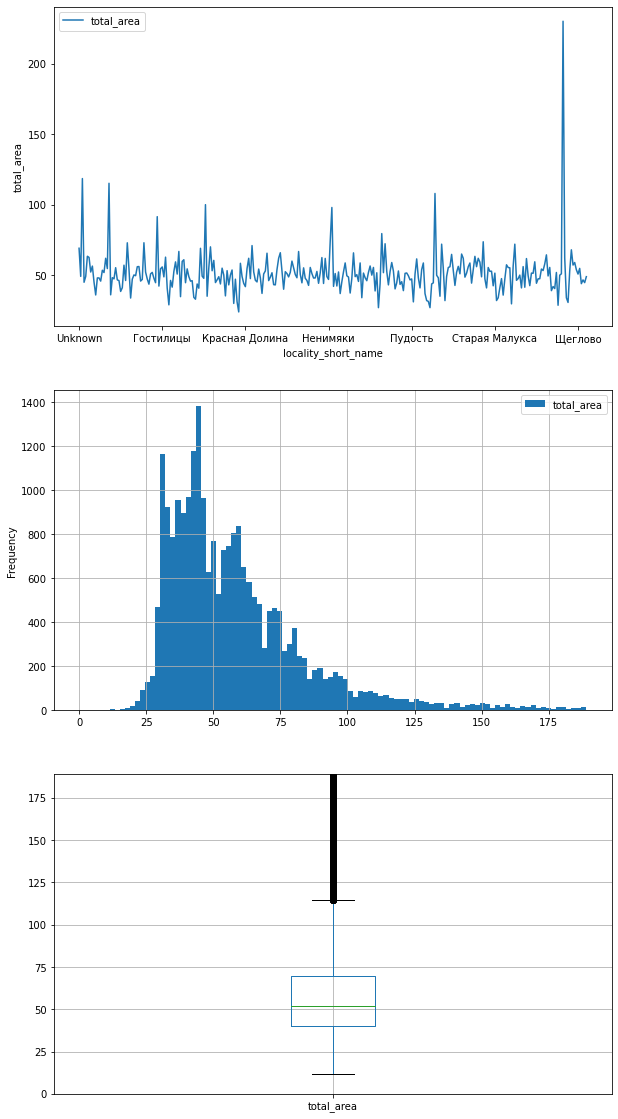

In [67]:
build_plots(estate_data, 'total_area', 'locality_short_name')

На первом графике явно видно аномально большое значение площади, которое наверняка будет сдвигать среднее значение дальше от медианы. Видимо, это максимальное значение в 900 м. В основном, значения колеблятся в районе 50 м.

На гистограмме видно два пика (что, вероятно, относятся к 1- и 2-хкомнатным квартирам)- квартиры с площадью 30 - 45 м и квартиры площадью 50-65 м. Половина предложений имеет площадь до 52 м. Квартиры более 80 метров продаются значительно реже. Также присутствует длинный хвост с большими редкими величинами. Есть жилье и малой площади менее 30 м. 

По диаграмме размаха можно сказать, что значения площади уже более 120 метров редкие.  
А вот значения меньше 30 метров не вышли за границы усов. 

Найдем процент больших значений площади.

In [68]:
print('{:.1%}'.format(estate_data[estate_data['total_area'] > 120].shape[0]/estate_data.shape[0]))

4.5%


In [69]:
estate_data.query('total_area > 120')['locality_short_name'].value_counts().head()

Санкт-Петербург    981
Пушкин              19
Сестрорецк          10
Выборг               5
Петергоф             4
Name: locality_short_name, dtype: int64

Из этих 4.5% почти все данные - по Санкт-Петербургу. Если удалим их, можем лишиться важной информации, например, о предложениях и ценах на недвижимость в центре.

In [70]:
(estate_data
 .query('total_area > 120 & locality_short_name == "Санкт-Петербург" & cityCenters_nearest < 10000')['locality_short_name']
 .value_counts()
)

Санкт-Петербург    797
Name: locality_short_name, dtype: int64

Большая часть данных находится в городе на расстоянии около 10 км от центра. Не стоит жертвовать этими данными, иначе впоследствие можем неправильно оценить стоимость жилья в центре. Попробуем рассмотреть предложения с площадью до 200 м.

### Анализ показателя цена объекта

In [71]:
estate_data['last_price'].describe()

count    2.361300e+04
mean     6.541369e+06
std      1.090189e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Сразу бросается в глаза разброс цен в 10 млн руб., минимальное значение, равное 12190 рублей - явный выброс. А максимальное значение в нашей выборке 763 млн руб.  

In [72]:
min_index = estate_data[estate_data['last_price'] == estate_data['last_price'].min()].index
estate_data.drop(min_index)['last_price'].describe()

count    2.361200e+04
mean     6.541645e+06
std      1.090204e+07
min      4.300000e+05
25%      3.403750e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная стоимость в 430 тыс. руб. в принципе может быть где-то в дали от центра за квартиру небольшой площади или за комнату.

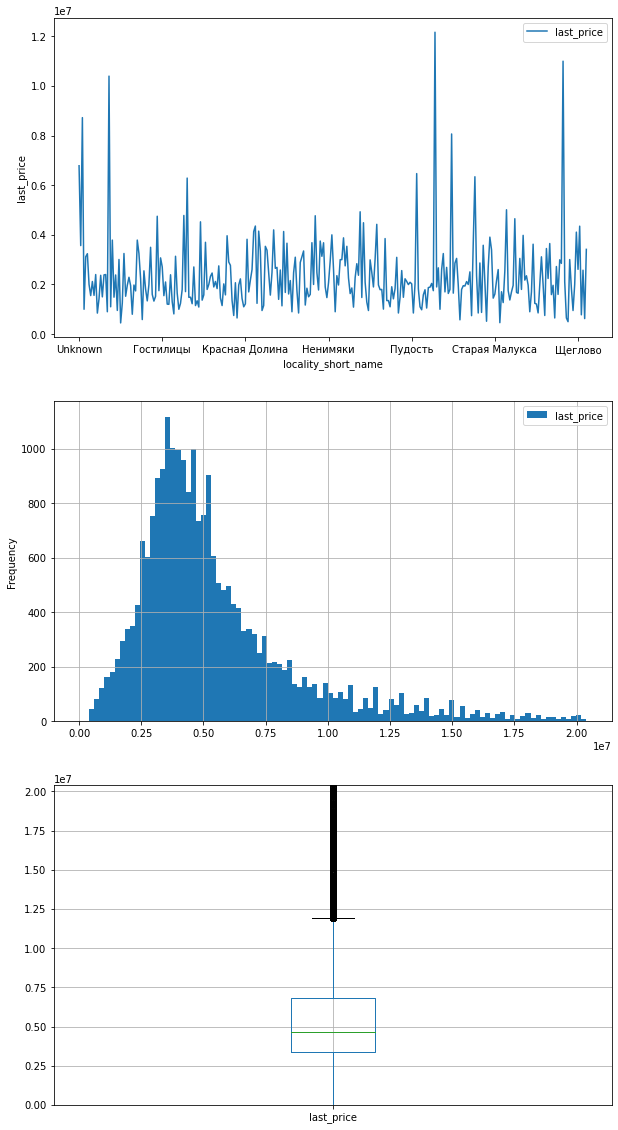

In [73]:
build_plots(estate_data, 'last_price', 'locality_short_name')

Первый график подтверждает высокий разброс цен. Но по графику можно сказать, что средняя стоимость где-то до 4 млн. Хотя, статистики говорят другое. Медиана - 4.65 млн руб., среднее 6.5 млн руб.

На гистограмме видим пик стоимости от 3 до 7 млн руб. и длинный хвост больших значений цены. 

Диаграмма размаха также говорит нам, что значения больше 12.5 млн руб. аномально большие для нашего датасета, но их достаточно много.

In [74]:
print('{:.2%}'.format(estate_data.query('last_price > 20*10**6').shape[0]/estate_data.shape[0]))

2.99%


Предложений дороже 20 млн руб. тоже не мало.

In [75]:
estate_data.query('12.5*10**6 <= last_price & locality_name == "Санкт-Петербург"').shape[0]

1784

Но, убрав эти значения, мы потеряем часть информации о предложениях в Санкт-Петербурге. Отступим от этого порога до 15 млн руб.

In [76]:
(estate_data
 .query('last_price < 15*(10**6)')['last_price']
 .describe()
)

count    2.237200e+04
mean     5.141458e+06
std      2.683088e+06
min      1.219000e+04
25%      3.351324e+06
50%      4.500000e+06
75%      6.300000e+06
max      1.500000e+07
Name: last_price, dtype: float64

Среднее значение теперь стало ближе к медиане. С 6.5 млн оно упало до 5.

### Анализ показателя число комнат

In [77]:
estate_data['rooms'].describe()

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [78]:
estate_data.query('rooms > 4').shape[0]

519

In [79]:
estate_data['rooms'].value_counts(normalize=True).head()

1    0.339432
2    0.335112
3    0.245416
4    0.049845
5    0.013764
Name: rooms, dtype: float64

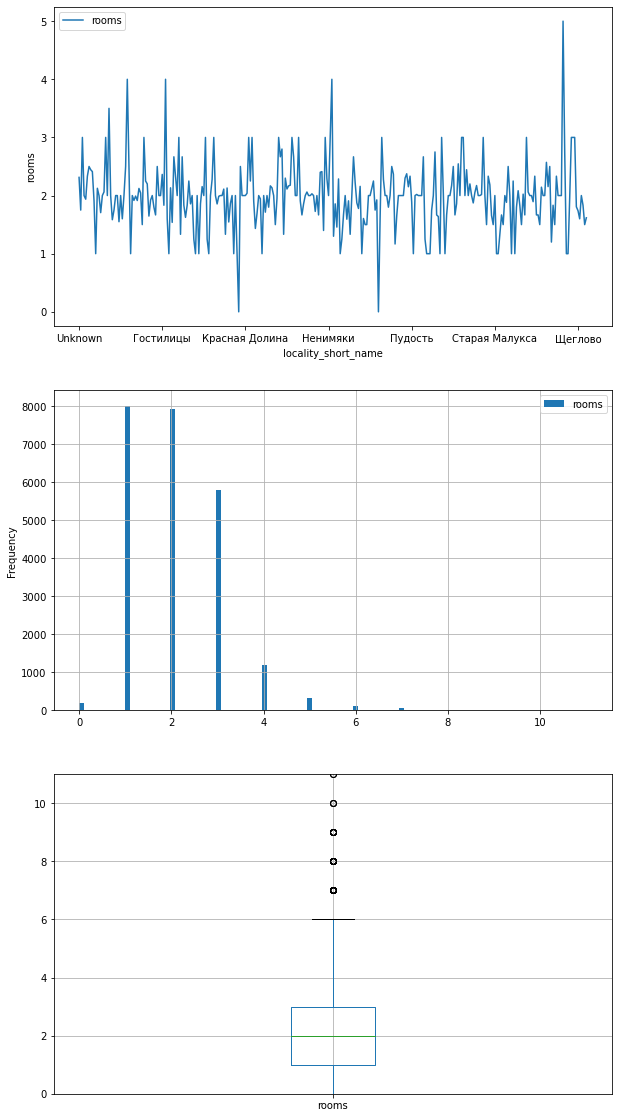

In [80]:
build_plots(estate_data, 'rooms', 'locality_short_name')

На первом графике видим, что среднее колеблется в районе 2 комнат.

Видим, что в выборке примерно одинаковое количество квартир с 1 и 2 комнатами. Чуть меньше с 3 комнатами. Также есть значения 0 - квартиры-студии или комнаты на общей кухне. По этому столбцу совпадают среднее и медиана. Значит, число аномально больших значений не так велико.

На диаграмме размаха видно, что значения `rooms` больше 6 - редкие. Таких предложений всего 90.

In [81]:
estate_data.query('rooms > 6')['rooms'].count()

90

### Анализ показателя высота потолков

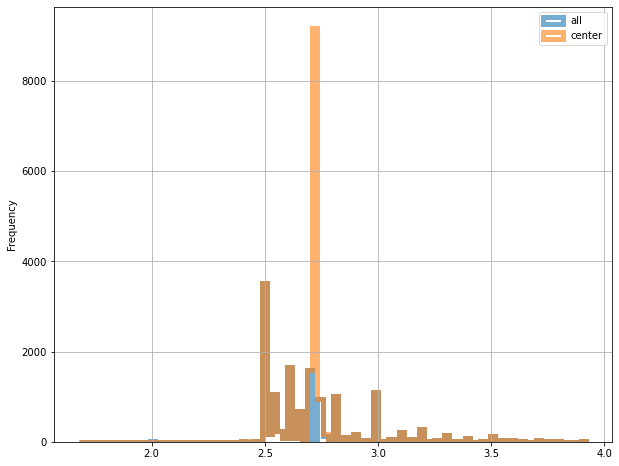

In [82]:
combine_hist(raw_data, estate_data, 'ceiling_height')

In [83]:
print('{:.0%}'.format(raw_data['ceiling_height'].count()/raw_data.shape[0]))

61%


Изначально в выборке было заполнено только 61% данных столбца. Пик приходился на значение 2.5 м.  
Вообще, высота потолков - величина стандартная в большинстве случаев, может быть, поэтому её и не заполнили на сайте.  
Мы заполнили пропуски средним значением 2.73 м.

После заполнения пропусков виден пик около 2.7 м. Около 40% пропусков повлияло на результирующее распределение.  
В любом случае, высота потолков в большинстве своем стандартизирована и вряд ли можно ожидать большой разброс в значениях. Хотя, не исключено, что в старых домах Санкт-Петербурга высота потолков действительно может превышать 4 м. Но, так как года постройки дома у нас нет, заполнили пропуски средним значением.

In [84]:
raw_data['ceiling_height'].value_counts()

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [85]:
estate_data['ceiling_height'].value_counts()

2.73    9153
2.50    3515
2.60    1646
2.70    1573
3.00    1111
        ... 
4.90       1
3.82       1
3.59       1
4.80       1
3.44       1
Name: ceiling_height, Length: 168, dtype: int64

In [86]:
estate_data['ceiling_height'].describe()

count    23613.000000
mean         2.728434
std          0.217623
min          2.200000
25%          2.600000
50%          2.730000
75%          2.730000
max          6.000000
Name: ceiling_height, dtype: float64

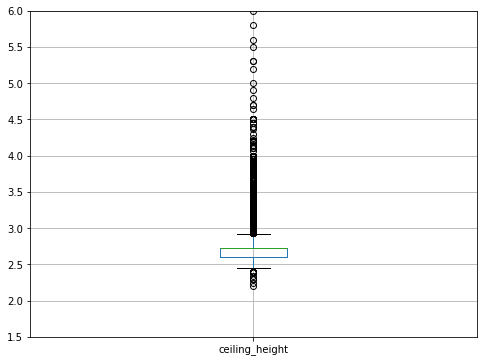

In [87]:
plt.figure(figsize=(8,6))
plt.ylim(1.5, 6)
estate_data.boxplot(column='ceiling_height');

На диаграмме размаха видим, что значения высоты потолков меньше 2.4 м и больше 2.8 м - уже аномальные. Но, учитывая рассматриваемый город, заметим, что для старой застройки Санкт-Петербурга характерны высокие потолки.
Тем более, что, избавившись от значений высоты потолка больше 3 метров, мы удалим достаточно много данных.

In [88]:
estate_data.query('3 < ceiling_height')['ceiling_height'].count()

1500

Думаю, лучше остановиться на диапазоне значений меньше или равном 4 м.

In [89]:
estate_data.query('ceiling_height > 4')['ceiling_height'].count()

46

### Анализ параметра время продажи квартиры

In [90]:
estate_data['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

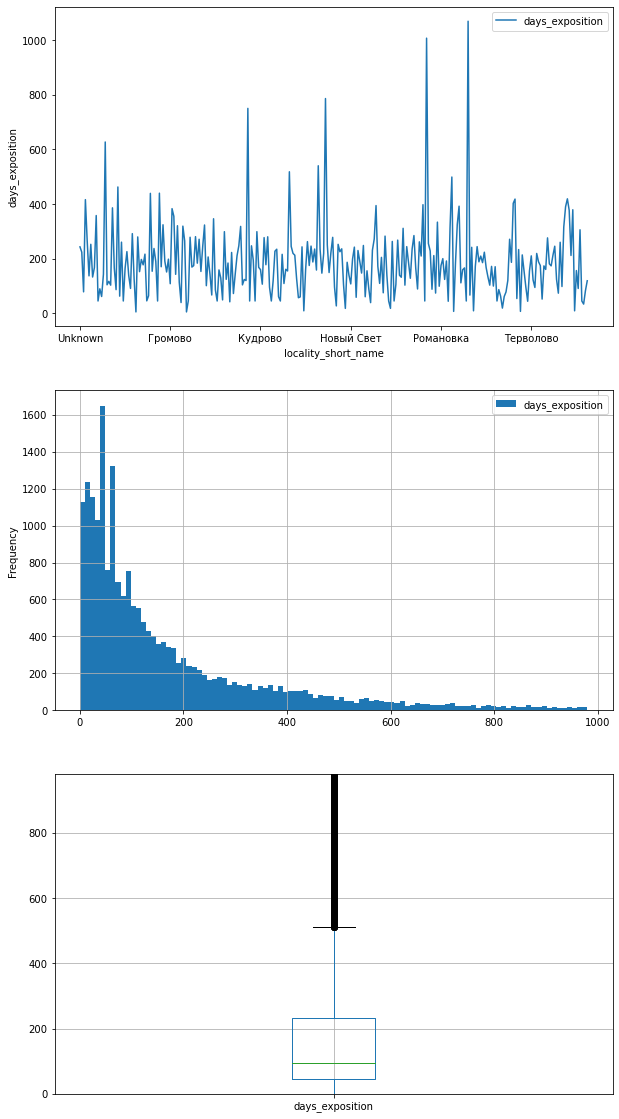

In [91]:
build_plots(estate_data, 'days_exposition', 'locality_short_name')

На первом графике видим, что среднее значение колеблется в районе 200 дней. Хотя медиана равна 95.  
На гистограмме видим распределение Пуассона с пиком на небольших значениях и длинным хвостом на больших. По распределению видно, что большинство продаж укладывается в 200 ней.  
Диаграмма размаха показывает, что количество дней более 500 уже редки.

Из-за слишком большого максимального срока продажи квартиры (1580 дней), среднее сильно смещено относительно медианы.  
Судя по медиане, в основном, квартиры продают в течение трех месяцев.  
Быстрая продажа - меньше чем за полтора месяца. Необычно долго можно считать продажи, прошедшие более, чем за 500 дней (более года).

In [92]:
estate_data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      201
         ... 
1355.0      1
873.0       1
730.0       1
976.0       1
773.0       1
Name: days_exposition, Length: 1139, dtype: int64

Доля квартир длительного срока продажи.

In [93]:
print('{:.1%}'.format(estate_data.query('days_exposition > 500')['days_exposition'].shape[0]/estate_data.shape[0]))

7.4%


### Вывод

В ходе исследования мы обнаружили аномально большие цены на недвижимость, огромные площади, необычно большое число комнат и высоту потолков выше среднестатистической не только в Санкт-Петербурге.  
Также были обнаружены и совсем крошечные предложения площадью 12 кв. м. Но в этом нет ничего особенного, можно продать комнату на общей кухне. Для Санкт-Петербурга наличие коммунальных квартир - не особенность. Кроме того, таких предложений не особо много, они не повлияют на среднее так сильно, как большие площади и цены.

### Убираем лишнее

Изучив гистограммы распределений параметров и диаграммы размаха, отбросим часть значений.

In [94]:
estate_data.shape[0]

23613

In [95]:
filtered_estate = estate_data.query('total_area <= 160 & 12190 < last_price <= 15*10**6 & rooms < 6 & ceiling_height <= 4').copy()
filtered_estate.shape[0]

22298

Посмотрим сколько данных осталось у нас после удаления редких выбивающихся значений.

In [96]:
print('{:.0%}'.format(filtered_estate.shape[0]/estate_data.shape[0]))

94%


In [97]:
estate_data.query('locality_short_name == "Санкт-Петербург"').shape[0]

15651

In [98]:
filtered_estate.query('locality_short_name == "Санкт-Петербург"').shape[0]

14396

Удалив 6% информации, мы постарались сохранить как можно больше данных о Санкт-Петербурге.

### Анализ зависимости величин

#### Посмотрим на связь цены и площади

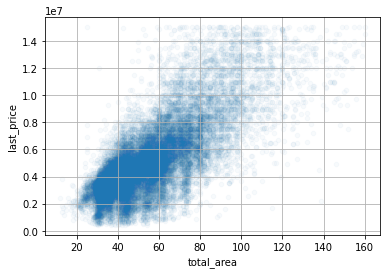

In [99]:
filtered_estate.plot(y='last_price', x='total_area', grid=True, kind='scatter', alpha=0.03);

In [100]:
filtered_estate['last_price'].corr(filtered_estate['total_area'])

0.743779632381915

По графику четко видна свзь  больше метров - выше цена. Также видно густо облако в районе самых частых предложений 30-60 квадратных метров площади стоимостью от 2 до 7 млн руб. Тесную связь подтверждает коэффициент корреляции.

#### Рассмотрим зависимость цены на недвижимость от количества комнат.

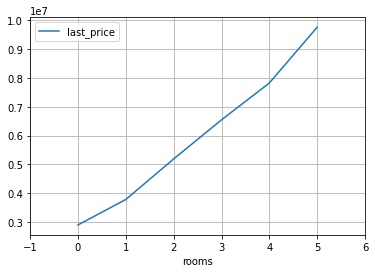

In [101]:
filtered_estate.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(grid=True, xlim=(-1, 6));

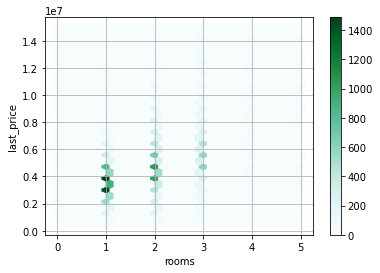

In [102]:
filtered_estate.plot(y='last_price', x='rooms', grid=True, kind='hexbin', gridsize=30, sharex=False);

In [103]:
filtered_estate['last_price'].corr(filtered_estate['rooms'])

0.4757579406104409

Явно прослеживается связь между величинами - чем больше комнат, тем дороже квартира.  Хотя, коэффициент корреляции невысок. Это также может обуславливаться наличием третьего фактора - удаленности от центра, например.

#### Рассмотрим связь между ценой и расстоянием до центра

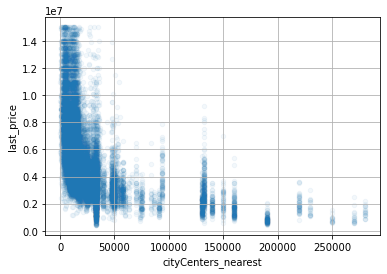

In [104]:
filtered_estate.plot(y='last_price', x='cityCenters_nearest', grid=True, kind='scatter', alpha=0.05);

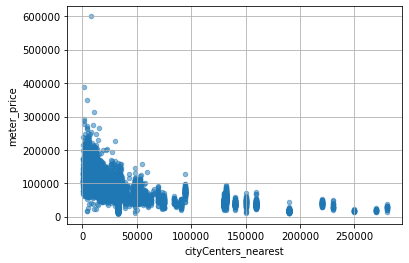

In [105]:
filtered_estate.plot(y='meter_price', x='cityCenters_nearest', grid=True, kind='scatter', alpha=0.5);

In [106]:
filtered_estate['last_price'].corr(filtered_estate['cityCenters_nearest'])

-0.40660004437548475

In [107]:
filtered_estate['meter_price'].corr(filtered_estate['cityCenters_nearest'])

-0.5528904274114586

По графику заметно, что есть жилье и дальше от центра, но стоимость в примерно том же диапазоне, что и стоимость близких к центру квартир. Коэффициент корреляции также говорит об отсутствии связи. Но только близко к центру мы видим высокие цены. Также видно, что наибольшее число предложений располагается ближе 50 км от города стоимостью от 3 млн руб.  
Думаю, низкий коэффициент корреляции объясняется наличием третьего фактора - площади. Может быть маленькая квартира в центре и большая далеко от центра с одинаковой стоимостью. Поэтому, если вычислить коэффициент корреляции для цены квадратного метра (которая уже учитывает в себе площадь), он получается значительно выше.  
Но стоит также заметить, что стоимость квадратного метра и в 100 км от центра и в 200 примерно одинакова.

#### Рассмотрим связь между ценой и этажом

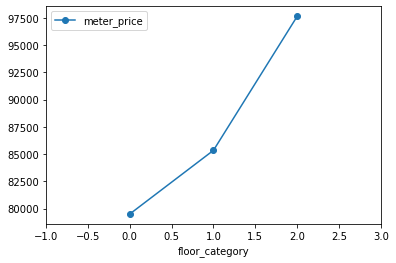

In [108]:
(filtered_estate
 .pivot_table(index='floor_category', values='meter_price', aggfunc='mean')
 .plot(style='o-', xlim=(-1, 3))
);

In [109]:
filtered_estate['meter_price'].corr(filtered_estate['floor_category'])

0.21625427338154768

По графику средних цен за квадратный метр в зависимости от этажа видно, что жилье на первых и последних этажах стоит дешевле, чем остальные. Но разница в цене не столько велика. Коэффициент корреляции говорит об отсутствии какой-либо связи.

#### Рассмотрим связь между ценой и датой публикации объявления

Зависимость средней стоимости объекта от года публикации объявления.

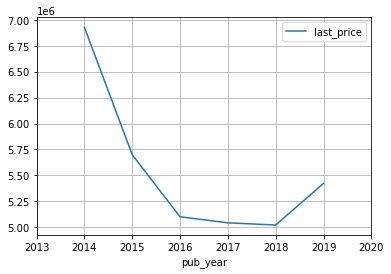

In [110]:
(filtered_estate
 .pivot_table(index='pub_year', values='last_price', aggfunc='mean')
 .plot(grid=True, xlim=(2013, 2020))
);

Зависимость цены квадратного метра от года публикации объявления.

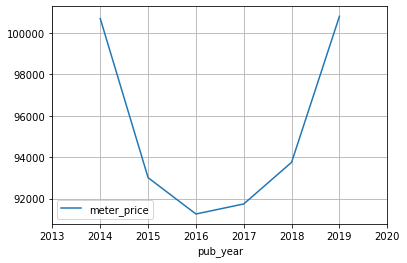

In [111]:
(filtered_estate
 .pivot_table(index='pub_year', values='meter_price', aggfunc='mean')
 .plot(grid=True, xlim=(2013, 2020))
);

Средняя цена за квадратный метр в год.

In [112]:
filtered_estate.pivot_table(index='pub_year', values='meter_price', aggfunc='mean').round(0)

,meter_price
pub_year,
2014,100695.0
2015,93013.0
2016,91260.0
2017,91746.0
2018,93756.0
2019,100805.0


Количество предложений по продаже жилья в зависимости от года.

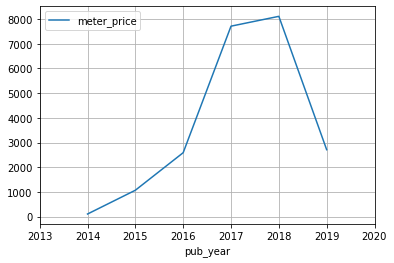

In [113]:
(filtered_estate
 .pivot_table(index='pub_year', values='meter_price', aggfunc='count')
 .plot(grid=True, xlim=(2013, 2020))
);

In [114]:
(filtered_estate
 .pivot_table(index='pub_year', values='meter_price', aggfunc='count')
 .sort_values(by='meter_price', ascending=False)
)

,meter_price
pub_year,
2018,8112
2017,7714
2019,2710
2016,2589
2015,1068
2014,105


График говорит о том, что в период с 2015 по 2018 год средняя цена за квадратный метр упала. Самая низкая отметка - в 2016 году цена меньше 92 тыс. за кв. м.  
Также видим, что в 2017-2018 годах объявлений подавалось в разы больше, чем в 2014 - 2016 и в 2019 году. Правда, нужно учесть, что за 2014 и за 2019 года у нас неполная статистика.

Рассмотрим зависимость средней цены за квадратный метр от месяца подачи объявления.

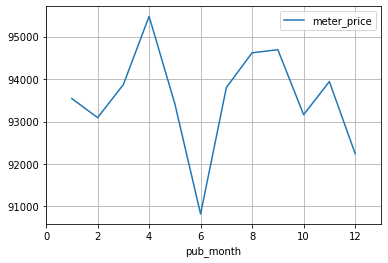

In [115]:
(filtered_estate
 .pivot_table(index='pub_month', values='meter_price', aggfunc='mean')
 .plot(grid=True, xlim=(0, 13))
);

Самая высокая стоимость квадратного метра зафиксирована в апреле. Самая низкая - в июне.

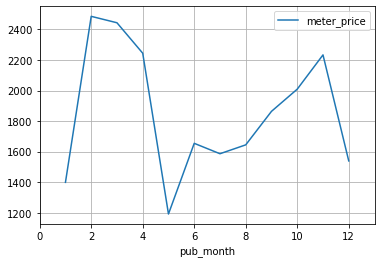

In [116]:
(filtered_estate
 .pivot_table(index='pub_month', values='meter_price', aggfunc='count')
 .plot(grid=True, xlim=(0, 13))
);

Судя по графику зависимости количества объявлений от месяца в году, меньше всего квартир продавалось в мае и летом. Может быть, в дачный сезон людям некогда думать о продаже недвижимости.

Исследуем зависимость количества предложений от дня недели.

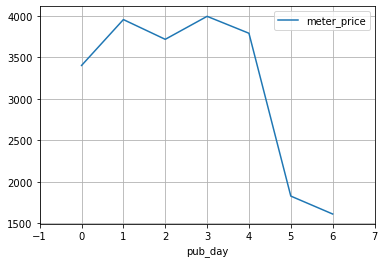

In [117]:
(filtered_estate
 .pivot_table(index='pub_day', values='meter_price', aggfunc='count')
 .plot(grid=True, xlim=(-1, 7))
);

В выходные объявлений заметно меньше.  

### Вывод 
Какие факторы больше всего влияют на стоимость квартиры?  
Стоимость жилой недвижимости, конечно, зависит от площади. Чем больше площадь, тем дороже.  
Количество комнат влияет опосредованно, ведь если площадь большая, то и количество комнат на ней больше, и стоимость выше.  
В центре квартиры однозначно дороже. Но по мере отдаления цена уже не так сильно меняется и выходит на плато.  
Этаж не сильно сказывается на цене.  
В период с 2015 по 2018 года цена квадратного метра была меньше. Одновременно с этим в конце этого периода в 2017-2018 годах количество объявлений было рекордно большим.

#### Выберем 10 населённых пунктов с наибольшим числом объявлений

In [118]:
count_stat = (filtered_estate
 .groupby(by='locality_short_name')['locality_short_name']
 .count()
 .sort_values(ascending=False)
 .head(10)
)
count_stat

locality_short_name
Санкт-Петербург    14396
Мурино               586
Кудрово              470
Шушары               439
Всеволожск           396
Пушкин               349
Колпино              337
Парголово            326
Гатчина              307
Выборг               234
Name: locality_short_name, dtype: int64

In [119]:
max_count_ids = count_stat.index.tolist()

#### Средняя цена квадратного метра в населённых пунктах.

In [120]:
(filtered_estate
 .query('locality_short_name in @max_count_ids')
 .pivot_table(index='locality_short_name', values=['meter_price', 'cityCenters_nearest'], )
 .sort_values(by='meter_price',ascending=False)
 .round(0)
.astype(int)
)

,cityCenters_nearest,meter_price
locality_short_name,,
Санкт-Петербург,12022,107385
Пушкин,28757,101210
Кудрово,16000,95261
Парголово,19923,90332
Мурино,25000,86041
Шушары,24243,78551
Колпино,32108,75333
Гатчина,48000,68817
Всеволожск,33000,67162


В Санкт-Петербурге цена за квадратный метр выше всего и составляет 107 тыс. руб.

Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [121]:
min_price = filtered_estate['last_price'].min()

In [122]:
(filtered_estate
 .pivot_table(index='locality_name', values='last_price', aggfunc='max')
 .sort_values(by='last_price', ascending=False)
 .head()
)

,last_price
locality_name,
Санкт-Петербург,15000000.0
Пушкин,15000000.0
Сестрорецк,14990000.0
Гатчина,13900000.0
Unknown,13540000.0


In [123]:
(filtered_estate
 .pivot_table(index='locality_name', values='last_price', aggfunc='min')
 .sort_values(by='last_price')
 .head()
)

,last_price
locality_name,
поселок станции Свирь,430000.0
Сланцы,430000.0
деревня Старополье,440000.0
деревня Вахнова Кара,450000.0
городской поселок Будогощь,450000.0


Максимальная стоимость жилья в Санкт-Петербурге и городе Пушкин, минимальная - в области.

Построим график зависимости цены от местоположения жилья.

In [124]:
new_column_value = filtered_estate[['cityCenters_nearest']].copy()

In [125]:
filtered_estate['cityCenters_km'] = round(new_column_value/1000, 0)

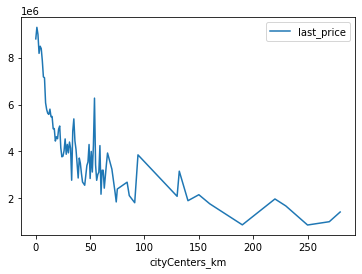

In [126]:
filtered_estate.pivot_table(index='cityCenters_km', values='last_price').plot();

По графику четко прослеживается связь - чем ближе к центру, тем дороже.

#### Выделим квартиры в центре

In [127]:
spb_offers = filtered_estate.query('locality_name == "Санкт-Петербург"').copy()

In [128]:
spb_offers['km_price'] = round(spb_offers['last_price'] / spb_offers['cityCenters_km'], 0)

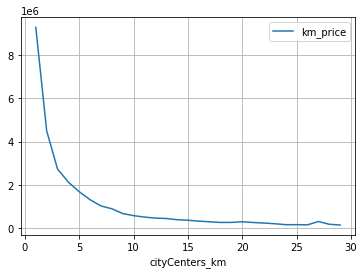

In [129]:
spb_offers.pivot_table(index='cityCenters_km', values='km_price').plot(grid=True);

По графику видно, что максимальная цена за километр может составлять 8 млн рублей. Это для недвижимости в самом центре. Но уже в 5 км от центра стоимость становится менее 2 млн и далее только падает. Выделим как центр область 5 км радиусом.

#### Рассмотрим квартиры в центре

In [130]:
center_data = spb_offers.query('cityCenters_nearest < 5000')
center_data.shape[0]

1535

In [131]:
center_data['total_area'].describe()

count    1535.000000
mean       75.752534
std        27.627061
min        12.000000
25%        55.550000
50%        72.300000
75%        93.200000
max       160.000000
Name: total_area, dtype: float64

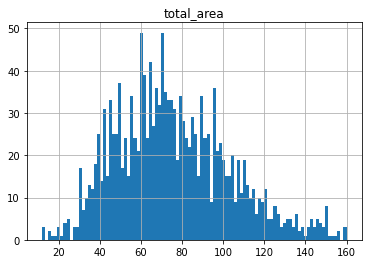

In [132]:
center_data.hist(column='total_area', bins=100);

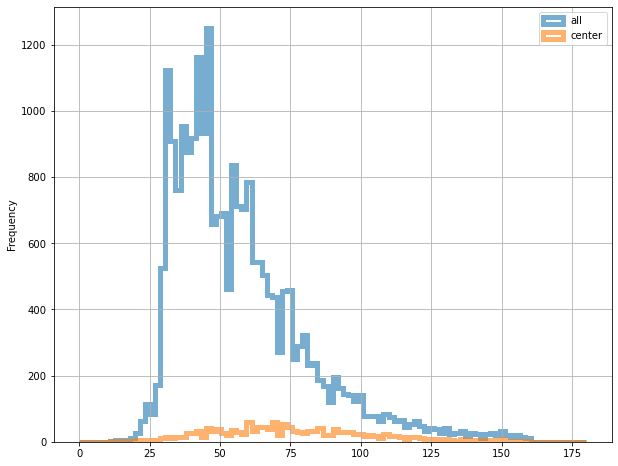

In [133]:
combine_hist(estate_data.query('total_area < 160'), center_data, 'total_area')

Выбор рынка недвижимости центра Санкт-Петербурга разнообразен. От минимальных площадей меньше 25 метров до жилья более 150 метров. Основная масса площадей находится в пределах 40 - 80 м.  
Распределение значений площади в районе центра Санкт-Петербурга похоже на нормальное распределение с небольшими значениями по краям диапазона и куполом в центре.

### Анализ параметра цена

In [134]:
center_data['last_price'].describe()

count    1.535000e+03
mean     8.608528e+06
std      2.880935e+06
min      1.600000e+06
25%      6.500000e+06
50%      8.299000e+06
75%      1.059500e+07
max      1.500000e+07
Name: last_price, dtype: float64

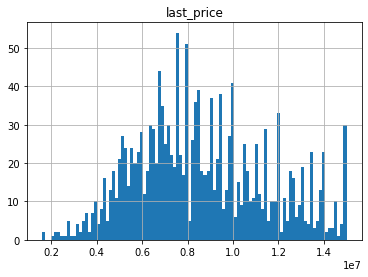

In [135]:
center_data.hist(column='last_price', bins=100);

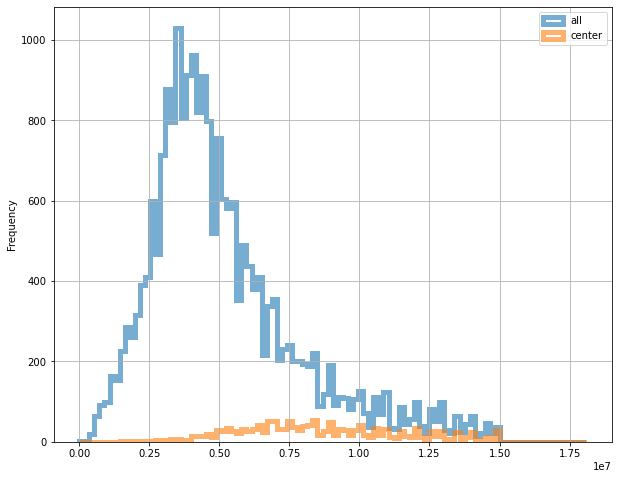

In [136]:
combine_hist(estate_data.query('last_price < 15 * 10 ** 6'), center_data, 'last_price')

Если в первоначальной выборке цены, приходящиеся на пик гистограммы, были в пределах 3 - 6 млн руб., то в центре Санкт-Петербурга основная масса предложений начинается от 5 млн и стоимость увеличивается до 15 млн в нашей выборке. Среднее и медиана близки между собой и колеблятся в районе 8.5 млн. руб.

### Анализ параметра число комнат

In [137]:
center_data['rooms'].describe()

count    1535.000000
mean        2.631270
std         1.081822
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: rooms, dtype: float64

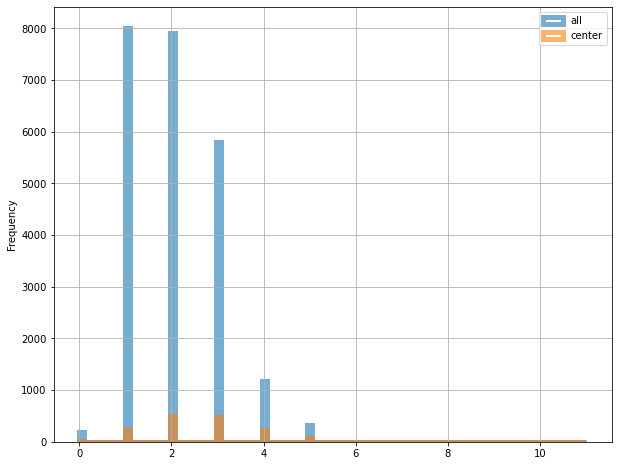

In [138]:
combine_hist(estate_data.query('rooms < 6'), center_data, 'rooms')

В центре больше доля предложений жилья с 2 и 3 комнатами, чем с 1 и более 4-х. И медиана также равна 3, в то время, как медиана и среднее в общей выборке были равны 2.

### Анализ параметра высота потолков

In [139]:
center_data['ceiling_height'].describe()

count    1535.000000
mean        2.978107
std         0.313672
min         2.400000
25%         2.730000
50%         2.900000
75%         3.200000
max         4.000000
Name: ceiling_height, dtype: float64

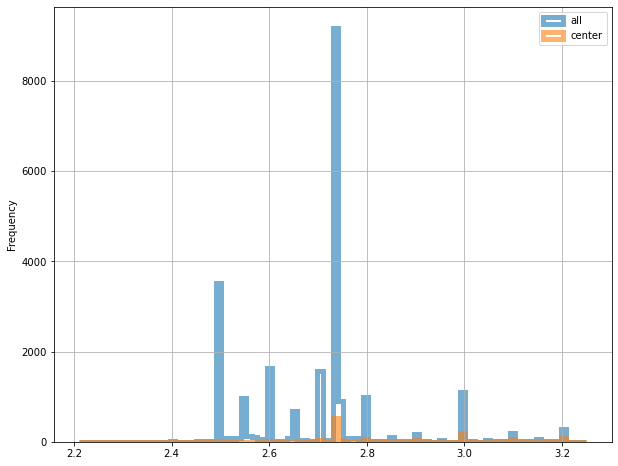

In [140]:
combine_hist(estate_data.query('ceiling_height < 4'), center_data, 'ceiling_height')

Несмотря на то, что изначально мы заполнили 40% пропусков в этом признаке значением 2.73, медиана распределения высоты потолков в центре Санкт-Петербурга равна 2.9 м. А среднее вообще близко к 3 м. Это значит, что в центре Санкт-Петербурга потолки выше, чем в общем по городу и области.

### Рассмотрим влияние разных факторов на цену

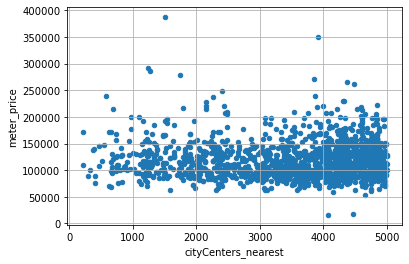

In [141]:
center_data.plot(y='meter_price', x='cityCenters_nearest', grid=True, kind='scatter');

Как видно по диаграмме рассеяния, в центре цены приблизительно одинаковые и нет явной тенденции "чем ближе к центру, тем выше цена". Ближе уже некуда.  
Также видны три точки с аномально маленькими значениями цены за квадратный метр. Видимо, это выбросы, которые мы не смогли обнаружить среди всех данных вначале обработки.

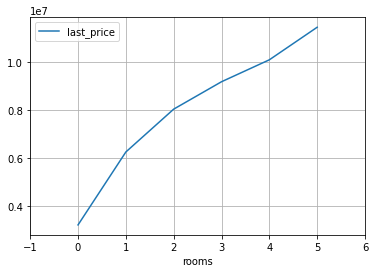

In [142]:
center_data.pivot_table(index='rooms', values='last_price', aggfunc='mean').plot(grid=True, xlim=(-1, 6));

In [143]:
center_data['last_price'].corr(center_data['rooms'])

0.4691948408042225

In [144]:
center_data['meter_price'].corr(center_data['rooms'])

-0.45962298800412854

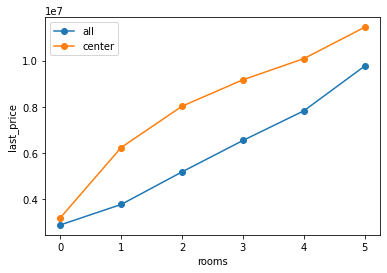

In [145]:
center_rooms_median = center_data.pivot_table(index='rooms', values='last_price', aggfunc='mean')
estate_rooms_median = filtered_estate.pivot_table(index='rooms', values='last_price', aggfunc='mean')

combine_plot(estate_rooms_median, center_rooms_median, 'rooms', 'last_price')

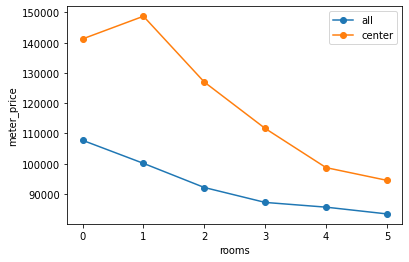

In [146]:
center_rooms_mean = center_data.pivot_table(index='rooms', values='meter_price', aggfunc='mean')
estate_rooms_mean = filtered_estate.pivot_table(index='rooms', values='meter_price', aggfunc='mean')

combine_plot(estate_rooms_mean, center_rooms_mean, 'rooms', 'meter_price')

Также, как и в случае с целой выборкой, в центре Санкт-Петербурга законы те же - чем больше комнат, тем выше цена. Но, если рассмотреть цену за квадратный метр, то на самом деле цена будет снижаться с увеличением площади. Просто сама по себе стоимость  трехкомнатной квартиры, конечно, выше стоимости двухкомнатной, но в пересчете за квадратный метр, цена ниже. Эта зависимость подтверждается коэффициентом корреляции. То же верно и для всех предложений, не только для центра города.

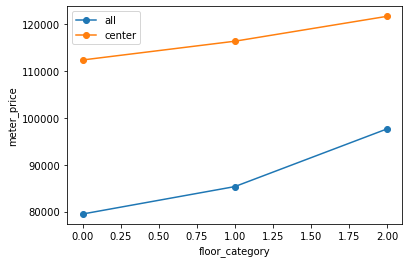

In [147]:
center_floors = center_data.pivot_table(index='floor_category', values='meter_price', aggfunc='mean')
estate_floors = filtered_estate.pivot_table(index='floor_category', values='meter_price', aggfunc='mean')

combine_plot(estate_floors, center_floors, 'floor_category', 'meter_price')

In [148]:
center_data['meter_price'].corr(center_data['floor_category'])

0.10226147654053944

Также, как и в случае с целой выборкой, на графике видно, что первый и последний этажи в среднем стоят дешевле, но коэффициент корреляции не показывает никакой связи.

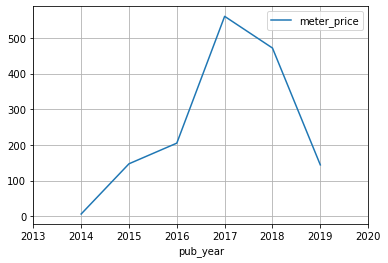

In [149]:
(center_data
 .pivot_table(index='pub_year', values='meter_price', aggfunc='count')
 .plot(grid=True, xlim=(2013, 2020))
);

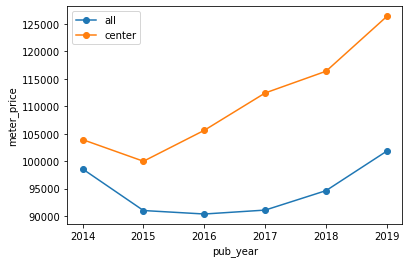

In [150]:
center_pub_year = center_data.pivot_table(index='pub_year', values='meter_price', aggfunc='median')
estate_pub_year = filtered_estate.pivot_table(index='pub_year', values='meter_price', aggfunc='median')

combine_plot(estate_pub_year, center_pub_year, 'pub_year', 'meter_price')

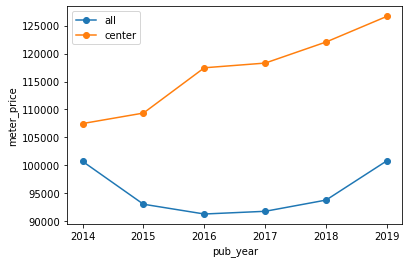

In [151]:
center_pub_year = center_data.pivot_table(index='pub_year', values='meter_price', aggfunc='mean')
estate_pub_year = filtered_estate.pivot_table(index='pub_year', values='meter_price', aggfunc='mean')

combine_plot(estate_pub_year, center_pub_year, 'pub_year', 'meter_price')

В отличие от всей выборки, цены на недвижимость в центре не падают в любые времена. Только в 2015 году медиана цены за квадратный метр стала ниже меньше, чем на 5 тыс. руб. В остальное время сохранилась общая тенденция к росту.

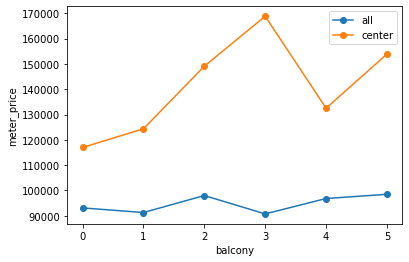

In [152]:
center_balcony = center_data.pivot_table(index='balcony', values='meter_price', aggfunc='mean')
estate_balcony = filtered_estate.pivot_table(index='balcony', values='meter_price', aggfunc='mean')

combine_plot(estate_balcony, center_balcony, 'balcony', 'meter_price')

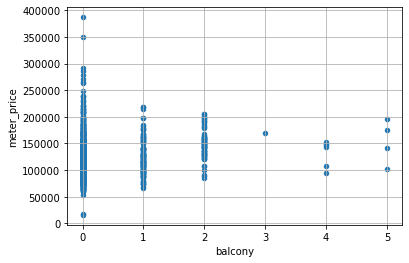

In [153]:
center_data.plot(y='meter_price', x='balcony', grid=True, kind='scatter');

Хотя и заметно, что значения цены квадратного метра для предложений с 1 и 2 балконами возрастают, трудно сказать о какой-либо явной связи.

## Общий вывод

Целью нашего исследования было выяснить, какие факторы больше всего влияют на стоимость квартиры.  
Мы изучили параметры площадь квартиры, стоимость, количество комнат, высота потолков, время продажи квартиры сначала по всей выборке. Избавились от редких и выбивающихся значений. Нашли населенные пункты с наибольшим числом объявлений, с самой высокой и самой низкой стоимостью жилья. Установили факторы, влияющие на итоговую стоимость квартиры.  

Среди таких факторов оказались площадь, расстояние до центра. Число комнат влияет на результирующую стоимость опосредованно через размер площади жилья. Чем больше площадь, тем больше комнат. Этаж не оказывает ощутимого влияния на цену. Балкон также не сказывается на стоимости.    
В основном, жилье продается в течение трех месяцев.  
Мы выяснили, что центр города находится в радиусе 5 км.  

В центре Санкт-Петербурга в среднем продаются квартиры большей площади (72 - 75 кв. м./ 60 кв. м. по всей выборке), с большим числом комнат (в центре 2,6 - 3 комнаты / 2 комнаты по общей выборке), по более высокой цене за квадратный метр (8.6 млн руб. / 5 млн руб. по всем данным). Также в среднем, потолки в квартирах в центре выше (2.9 м / 2.7 м).    
Также было отмечено, что в период с 2015 по 2018 год средняя цена за квадратный метр по области упала со 100.695 руб. за кв. м. до 91263 руб. Но это не сказалось на ценах на квартиры в центре Санкт-Петербурга. Здесь средняя цена за квадратрый метр выросла со 107 тыс. руб. до 126 тыс. руб.